In [1]:
#Taken from https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html and modified
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
def oracle(val, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # Next, format 'val' as a binary string of length 'n', padded with zeros:
    b_str = format(val, '0'+str(n)+'b')
    # Next, we place the first X-gates. Each digit in our binary string 
    # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
    # we apply an X-gate to that qubit:
    for qubit in range(len(b_str)):
        if b_str[qubit] == '1':
            oracle_qc.x(qubit)
    # Do the controlled-NOT gates for each qubit, using the output qubit 
    # as the target:
    for qubit in range(n):
        oracle_qc.cx(qubit, n)
    # Next, place the final X-gates
    for qubit in range(len(b_str)):
        if b_str[qubit] == '1':
            oracle_qc.x(qubit)

    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate, oracle_qc

In [3]:
def amplification(n):
    amplification_qc = QuantumCircuit(n+1, name = 'reflection')
    for i in range(n+1):
        amplification_qc.h(i)
        amplification_qc.x(i)
    amplification_qc.mct(list(range(n)),n)
    for i in range(n+1):
        amplification_qc.x(i)
        amplification_qc.h(i)
    amplification_gate = amplification_qc.to_gate()
    amplification_gate.name = "Amplifier"
    return amplification_gate, amplification_qc

In [4]:
#TODO: Implementation is being tested
def grover_algorithm(oracle, amplifier_gate, n):
    grover_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    grover_circuit.x(n)
    grover_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        grover_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    for iteration in range(int(n)):
        grover_circuit.append(oracle, range(n+1))
        grover_circuit.append(amplifier_gate,range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        grover_circuit.h(qubit)
    
    for i in range(n):
        grover_circuit.measure(i, i)
    
    return grover_circuit

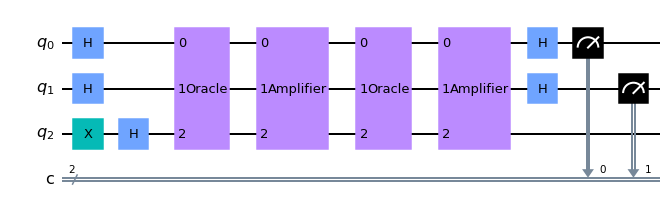

In [5]:
n = 2
oracle_gate,b = oracle(1, n)
amplifier_gate,c = amplification(n)
grover_circuit = grover_algorithm(oracle_gate,amplifier_gate, n)
grover_circuit.draw()

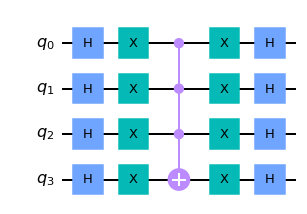

In [6]:
a,b=amplification(3)
b.draw()

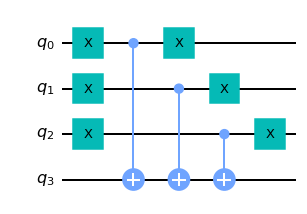

In [7]:
a,b=oracle(7,3)
b.draw()

In [8]:
# use local simulator
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024

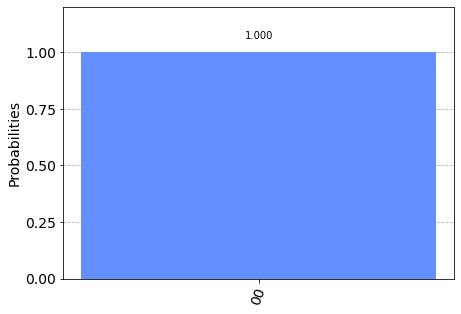

In [9]:
transpiled_grover_circuit = transpile(grover_circuit, qasm_sim)
qobj = assemble(transpiled_grover_circuit)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

In [10]:
test_hadamard = QuantumCircuit(2)
test_hadamard.h(list(range(2)))
for i in range(2):
    test_hadamard.measure(i, i)
test_hadamard.draw()
test_h_g= test_hadamard.to_gate()

CircuitError: 'Index out of range.'

In [ ]:
# use local simulator
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
transpiled_had_circuit = transpile(test_hadamard, qasm_sim)
qobj = assemble(transpiled_had_circuit)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)